# Using SURFsara IoT platform for Sensemakers - demo #1

This notebook shows how to:
- access files in the shared volume
- load raw data JSON files into a Pandas DataFrame
- perform simple data manipulations
- inspect data
- produce plots
- store results in the project volume for later use

## Accessing files in the shared volume

The individual messages processed by the automated data pipeline are appended to files for a given project/device and a calendar date. The naming convention for the directories/files is `/data/app_id/dev_id-YYYY-MM-DD.json`. The shared volume is accessible from Jupyter notebooks in read-only mode.

The files in the shared volume can be listed in the following way:

In [1]:
!ls /home/shared/WON/SMA-A42924*

/home/shared/WON/SMA-A42924-2019-09-17.json
/home/shared/WON/SMA-A42924-2019-09-18.json
/home/shared/WON/SMA-A42924-2019-09-19.json
/home/shared/WON/SMA-A42924-2019-09-20.json
/home/shared/WON/SMA-A42924-2019-09-21.json
/home/shared/WON/SMA-A42924-2019-09-22.json
/home/shared/WON/SMA-A42924-2019-09-23.json
/home/shared/WON/SMA-A42924-2019-09-24.json
/home/shared/WON/SMA-A42924-2019-10-01.json
/home/shared/WON/SMA-A42924-2019-10-04.json
/home/shared/WON/SMA-A42924-2019-10-05.json
/home/shared/WON/SMA-A42924-2019-10-06.json
/home/shared/WON/SMA-A42924-2019-10-07.json
/home/shared/WON/SMA-A42924-2019-10-08.json
/home/shared/WON/SMA-A42924-2019-10-09.json


The files contain raw messages in the JSON format line-by-line.

In [2]:
!head /home/shared/WON/SMA-A42924-2019-10-09.json

{"app_id": "WON", "dev_id": "SMA-A42924", "payload_fields": {"hum": 72, "temp": 13}, "time": 1570579212418}
{"app_id": "WON", "dev_id": "SMA-A42924", "payload_fields": {"hum": 72, "temp": 13}, "time": 1570579243368}
{"app_id": "WON", "dev_id": "SMA-A42924", "payload_fields": {"hum": 72, "temp": 13}, "time": 1570579274070}
{"app_id": "WON", "dev_id": "SMA-A42924", "payload_fields": {"hum": 72, "temp": 13}, "time": 1570579304818}
{"app_id": "WON", "dev_id": "SMA-A42924", "payload_fields": {"hum": 72, "temp": 13}, "time": 1570579335819}
{"app_id": "WON", "dev_id": "SMA-A42924", "payload_fields": {"hum": 72, "temp": 12}, "time": 1570579366433}
{"app_id": "WON", "dev_id": "SMA-A42924", "payload_fields": {"hum": 72, "temp": 12}, "time": 1570579397294}
{"app_id": "WON", "dev_id": "SMA-A42924", "payload_fields": {"hum": 72, "temp": 12}, "time": 1570579428098}
{"app_id": "WON", "dev_id": "SMA-A42924", "payload_fields": {"hum": 71, "temp": 12}, "time": 1570579458919}
{"app_id": "WON", "dev_id": 

## Load raw data JSON files into a pandas DataFrame

We choose to use [pandas](https://pandas.pydata.org/) DataFrame to analyse data. First, we need to install corresponding Python package.

In [3]:
!pip install --upgrade pip
!pip install pandas

Requirement already up-to-date: pip in /opt/conda/lib/python3.6/site-packages (19.2.3)


A file from the shared volume can be loaded like this with a single command.

In [4]:
import pandas as pd

# Load a single JSON file into a Pandas DataFrame.
df = pd.read_json('/home/shared/WON/SMA-A42924-2019-10-09.json', lines=True)

# Show the datafame.
df

,app_id,dev_id,payload_fields,time
0,WON,SMA-A42924,"{'hum': 72, 'temp': 13}",1570579212418
1,WON,SMA-A42924,"{'hum': 72, 'temp': 13}",1570579243368
2,WON,SMA-A42924,"{'hum': 72, 'temp': 13}",1570579274070
3,WON,SMA-A42924,"{'hum': 72, 'temp': 13}",1570579304818
4,WON,SMA-A42924,"{'hum': 72, 'temp': 13}",1570579335819
...,...,...,...,...
1146,WON,SMA-A42924,"{'hum': 75, 'temp': 12}",1570614518883
1147,WON,SMA-A42924,"{'hum': 75, 'temp': 12}",1570614549685
1148,WON,SMA-A42924,"{'hum': 75, 'temp': 12}",1570614580559
1149,WON,SMA-A42924,"{'hum': 75, 'temp': 12}",1570614611184


Multiple files can be loaded like this:

In [5]:
import glob

# List all files for project WON and device SMA-A42924.
files = glob.glob('/home/shared/WON/SMA-A42924*')

# Define an empty dataframe.
df0 = pd.DataFrame()

# Loop over all files and load them to the dataframe.
for file in files:
    tmp = pd.read_json(file, lines=True)
    df0 = df0.append(tmp, ignore_index=True)
    
# Show the dataframe.
df0

,app_id,dev_id,payload_fields,time
0,WON,SMA-A42924,"{'hum': 44, 'temp': 32}",1568736882712
1,WON,SMA-A42924,"{'hum': 44, 'temp': 32}",1568736890062
2,WON,SMA-A42924,"{'hum': 99, 'temp': 5}",1568739996633
3,WON,SMA-A42924,"{'hum': 52, 'temp': 25}",1568741819847
4,WON,SMA-A42924,"{'hum': 52, 'temp': 25}",1568741851198
...,...,...,...,...
25626,WON,SMA-A42924,"{'hum': 95, 'temp': 11}",1570492671406
25627,WON,SMA-A42924,"{'hum': 95, 'temp': 11}",1570492702231
25628,WON,SMA-A42924,"{'hum': 95, 'temp': 11}",1570492733183
25629,WON,SMA-A42924,"{'hum': 95, 'temp': 11}",1570492763781


The following commands may come handy for getting basic information about the dataframe.

In [6]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25631 entries, 0 to 25630
Data columns (total 4 columns):
app_id            25631 non-null object
dev_id            25631 non-null object
payload_fields    25631 non-null object
time              25631 non-null int64
dtypes: int64(1), object(3)
memory usage: 801.1+ KB


In [7]:
# Show the first few lines of the dataframe.
df0.head()

,app_id,dev_id,payload_fields,time
0,WON,SMA-A42924,"{'hum': 44, 'temp': 32}",1568736882712
1,WON,SMA-A42924,"{'hum': 44, 'temp': 32}",1568736890062
2,WON,SMA-A42924,"{'hum': 99, 'temp': 5}",1568739996633
3,WON,SMA-A42924,"{'hum': 52, 'temp': 25}",1568741819847
4,WON,SMA-A42924,"{'hum': 52, 'temp': 25}",1568741851198


In [8]:
# Show the types of the columns.
df0.dtypes

app_id            object
dev_id            object
payload_fields    object
time               int64
dtype: object

## Simple data manipulations

The dataframe we have loaded from the files in the cells above is not handy for data analytics yet. The most important values - the sensor measurements - are not easily accessible because they are all stored in a single column `payload_fields` as a dictionarly of key-value pairs. Therefore, we will reformat the dataframe such that every sensor measurement gets its own column.

In the previous section, we loaded all raw data files in dataframe `df0`. In the following cell, we will create a new dataframe `df1` with the new columns.

In [9]:
# Extract payload_fields as individual cloumns.
payload_fields = df0['payload_fields'].apply(pd.Series)

# Add the new columns to the dataframe.
df1 = df0.join(payload_fields)

# Remove the original column.
df1 = df1.drop('payload_fields', axis=1)

# Show the dataframe.
df1

,app_id,dev_id,time,hum,temp,fail
0,WON,SMA-A42924,1568736882712,44.0,32.0,NaN
1,WON,SMA-A42924,1568736890062,44.0,32.0,NaN
2,WON,SMA-A42924,1568739996633,99.0,5.0,NaN
3,WON,SMA-A42924,1568741819847,52.0,25.0,NaN
4,WON,SMA-A42924,1568741851198,52.0,25.0,NaN
...,...,...,...,...,...,...
25626,WON,SMA-A42924,1570492671406,95.0,11.0,NaN
25627,WON,SMA-A42924,1570492702231,95.0,11.0,NaN
25628,WON,SMA-A42924,1570492733183,95.0,11.0,NaN
25629,WON,SMA-A42924,1570492763781,95.0,11.0,NaN


In [10]:
# Show the column types.
df1.dtypes

app_id     object
dev_id     object
time        int64
hum       float64
temp      float64
fail      float64
dtype: object

Convert the unix epoch time to human-readable time format.

In [11]:
df1["datetime"] = pd.to_datetime(df1["time"], unit='ms')
df1["datetime"]

0       2019-09-17 16:14:42.712
1       2019-09-17 16:14:50.062
2       2019-09-17 17:06:36.633
3       2019-09-17 17:36:59.847
4       2019-09-17 17:37:31.198
                  ...          
25626   2019-10-07 23:57:51.406
25627   2019-10-07 23:58:22.231
25628   2019-10-07 23:58:53.183
25629   2019-10-07 23:59:23.781
25630   2019-10-07 23:59:54.807
Name: datetime, Length: 25631, dtype: datetime64[ns]

## Data inspection

In the previous section, we created dataframe `df1` that is convenient for analysis/inspection.

Show basic statistics for the data in numeric columns.

In [12]:
df1.describe()

,time,hum,temp,fail
count,2.563100e+04,25627.000000,25627.000000,4.0
mean,1.569696e+12,64.998049,17.633941,1.0
std,6.766886e+08,12.122427,6.549498,0.0
min,1.568737e+12,44.000000,5.000000,1.0
25%,1.569084e+12,55.000000,11.000000,1.0
50%,1.569282e+12,61.000000,22.000000,1.0
75%,1.570417e+12,75.000000,23.000000,1.0
max,1.570615e+12,99.000000,255.000000,1.0


Show the messages with `fail` = 1.

In [13]:
df1[df1["fail"] == 1]

,app_id,dev_id,time,hum,temp,fail,datetime
8681,WON,SMA-A42924,1568988788323,NaN,NaN,1.0,2019-09-20 14:13:08.323
8700,WON,SMA-A42924,1568989380951,NaN,NaN,1.0,2019-09-20 14:23:00.951
8701,WON,SMA-A42924,1568989419198,NaN,NaN,1.0,2019-09-20 14:23:39.198
8702,WON,SMA-A42924,1568989457398,NaN,NaN,1.0,2019-09-20 14:24:17.398


Remove the messages with `fail` = 1.

In [14]:
df2 = df1[df1["fail"] != 1]

## Data visualisations

We choose to use [matplotlib](https://matplotlib.org/) to analyse data. First, we need to install corresponding Python package.

In [15]:
!pip install matplotlib

Make sure the plots will be produced directly in the notebook.

In [16]:
%matplotlib inline

Plot histograms.

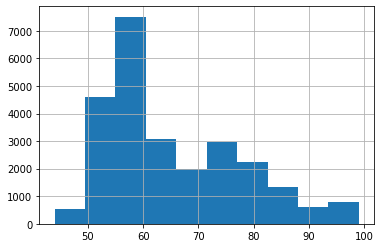

In [17]:
df2["hum"].hist()

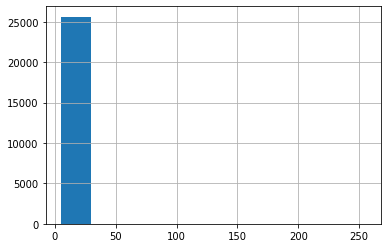

In [18]:
df2["temp"].hist()

The temperature histogram indicates there are outliers. This will become obvious in a histogram with logarithmic y-axis.

(array([2.5623e+04, 3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  5.,  30.,  55.,  80., 105., 130., 155., 180., 205., 230., 255.]),
 <a list of 10 Patch objects>)

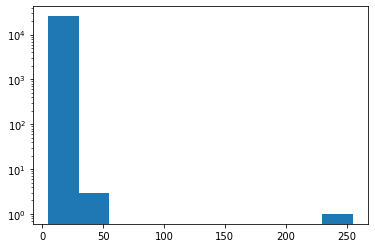

In [19]:
import matplotlib.pyplot as plt

plt.hist(df2['temp'], log=True) 

Box plots are also useful.

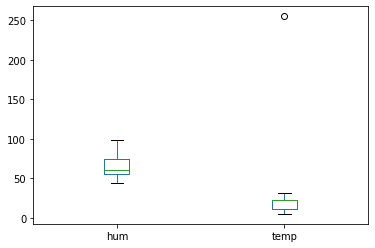

In [20]:
df2[["hum", "temp"]].plot.box()

Remove outliers.

In [21]:
df3 = df2[df2["temp"] < 100]

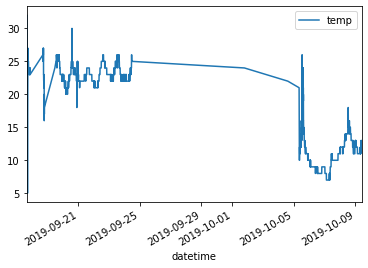

In [22]:
df3.plot(x="datetime", y="temp")

## Store results in the project volume

Save the plot as a pdf file. The file can be downloaded from the file browser on the left.

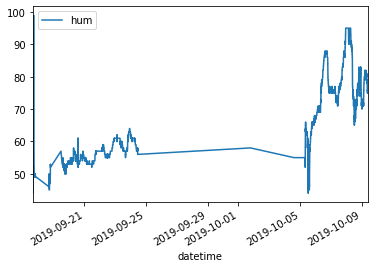

In [23]:
plot = df3.plot(x="datetime", y="hum")
plot.get_figure().savefig('hum.pdf', format='pdf')